In [1]:
import pandas as pd
import numpy as np 
from sklearn import linear_model
from sklearn import preprocessing
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv("learning_data.csv")

In [3]:
data.head()

,progress_ratio,theory_achieved,tasks_achieved,days_active,tries_count,score
0,1.000000,0.650000,0.433498,0.571429,0.744864,0.655462
1,0.099502,0.666667,0.516129,0.071429,0.293735,0.571429
2,0.960199,0.580000,0.556364,0.428571,0.744864,0.717949
3,0.064677,0.333333,0.387097,0.071429,0.293735,0.428571
4,0.472637,0.395833,0.443580,0.214286,0.744864,0.476190


In [4]:
data.shape

(18125, 6)

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score

In [62]:
y = data.progress_ratio.values
X = data

kf = KFold(n_splits=3, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    d = dict(X_train.groupby("encoded_value").progress_ratio.mean())
    X_train.drop(columns=["progress_ratio"], inplace=True)
    X_test.drop(columns=["progress_ratio"], inplace=True)
    X_train.encoded_value = X_train.encoded_value.map(d)
    X_test.encoded_value = X_test.encoded_value.map(d)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_check = y_train.mean()
    print("on test : mse : {}, mae : {}, r2 : {}".format(mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test), model.score(X_test, y_test)))
    print("on train : r2 : {}".format(model.score(X_train, y_train)))
    print("Если брать константный ответ как среднее по y_train r2 : {}".format(r2_score(y_test, [y_train.mean()] * y_test.shape[0])))
    for name, score in dict(zip(data.drop(columns="progress_ratio").columns, model.coef_)).items():
        print("{}, w : {}".format(name, score))
    print(".............................")

on test : mse : 0.032737131207776805, mae : 0.1556567947086563, r2 : -0.3031566352227728
on train : r2 : 0.26267068388818604
Если брать константный ответ как среднее по y_train r2 : -1.47973346950603
theory_achieved, w : 0.05020009867747202
tasks_achieved, w : 0.3462520721138962
days_active, w : 0.41120627870963067
encoded_value, w : 0.4829305544869855
.............................
on test : mse : 0.03970106249066713, mae : 0.1588468728771395, r2 : 0.05496029373680622
on train : r2 : 0.3069260201146269
Если брать константный ответ как среднее по y_train r2 : -0.365050042770372
theory_achieved, w : 0.05721911677996491
tasks_achieved, w : 0.36767361691090195
days_active, w : 0.4974745658072704
encoded_value, w : 0.4412072845286146
.............................
on test : mse : 0.1274340313405597, mae : 0.26321152395486747, r2 : -0.38999404377300206
on train : r2 : 0.27293133016946336
Если брать константный ответ как среднее по y_train r2 : -1.0943954174647432
theory_achieved, w : 0.061274

In [6]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data, data.progress_ratio, test_size=0.33, random_state=42)
X_train.drop(columns=["progress_ratio"], inplace=True)
X_test.drop(columns=["progress_ratio"], inplace=True)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_check = y_train.mean()



print("on test : mse : {}, mae : {}, r2 : {}".format(mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred)))
print("on train : r2 : {}".format(r2_score(y_train, y_pred_train)))

for name, score in dict(zip(data.drop(columns="progress_ratio").columns, model.coef_)).items():
        print("{}, w : {}".format(name, score))
        

on test : mse : 0.055309277670405575, mae : 0.17255098263746427, r2 : 0.4344616053987068
on train : r2 : 0.42496804187165516
theory_achieved, w : -0.09807782114447892
tasks_achieved, w : -0.011843400913948088
days_active, w : 0.4902844742043161
tries_count, w : 0.11012430660755307
score, w : 0.601985952843358


C:\Users\Sirius\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
from sklearn.linear_model import BayesianRidge, Ridge, Lasso, ARDRegression, PoissonRegressor, TweedieRegressor, GammaRegressor

In [14]:
from catboost import CatBoostRegressor

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, data.progress_ratio, test_size=0.33, random_state=42)
X_train.drop(columns=["progress_ratio"], inplace=True)
X_test.drop(columns=["progress_ratio"], inplace=True)
model = CatBoostRegressor(iterations=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_check = y_train.mean()



print("on test : mse : {}, mae : {}, r2 : {}".format(mean_squared_error(y_pred, y_test), mean_absolute_error(y_pred, y_test), r2_score(y_test, y_pred)))
print("on train : r2 : {}".format(r2_score(y_train, y_pred_train)))


C:\Users\Sirius\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Learning rate set to 0.350276
0:	learn: 0.2739069	total: 3.16ms	remaining: 312ms
1:	learn: 0.2489808	total: 5.79ms	remaining: 284ms
2:	learn: 0.2351561	total: 8.45ms	remaining: 273ms
3:	learn: 0.2284461	total: 11ms	remaining: 264ms
4:	learn: 0.2246372	total: 13.7ms	remaining: 261ms
5:	learn: 0.2219932	total: 16.4ms	remaining: 256ms
6:	learn: 0.2205414	total: 18.8ms	remaining: 249ms
7:	learn: 0.2196281	total: 21.4ms	remaining: 246ms
8:	learn: 0.2187251	total: 23.8ms	remaining: 241ms
9:	learn: 0.2182473	total: 26.2ms	remaining: 236ms
10:	learn: 0.2173107	total: 28.9ms	remaining: 233ms
11:	learn: 0.2165750	total: 31.3ms	remaining: 230ms
12:	learn: 0.2158884	total: 33.7ms	remaining: 226ms
13:	learn: 0.2155816	total: 36.2ms	remaining: 222ms
14:	learn: 0.2150963	total: 38.7ms	remaining: 219ms
15:	learn: 0.2149031	total: 40.7ms	remaining: 214ms
16:	learn: 0.2140288	total: 43.3ms	remaining: 211ms
17:	learn: 0.2136037	total: 45.8ms	remaining: 209ms
18:	learn: 0.2132700	total: 48.3ms	remaining: 

<AxesSubplot:>

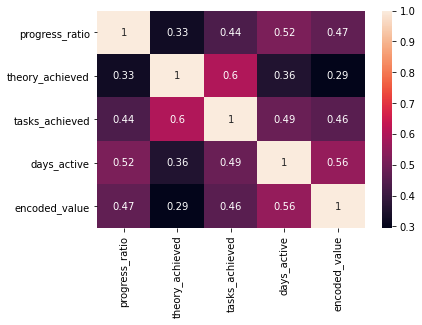

In [128]:
sns.heatmap(X_test.corr(), annot=True)

In [127]:
import seaborn as sns

<AxesSubplot:xlabel='progress_current_ratio', ylabel='Count'>

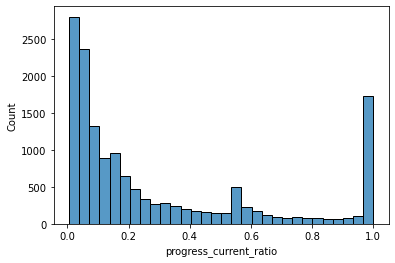

In [249]:
sns.histplot(data=data, x=name, bins=30)


## tries_c

In [248]:
points = []
name = 'progress_current_ratio'
x = 2500
for n in range(0, x, 10):
    points.append((n, (data[name] < n).sum()))

max 18462.0, % lost : 1.210954480531578


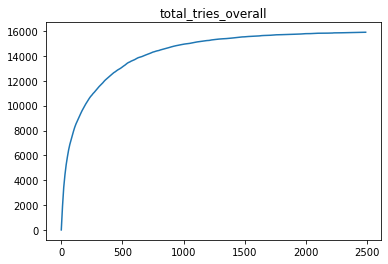

In [219]:
sns.lineplot(x = [i[0] for i in points], y = [i[1] for i in points]).set(title=name)
print("max {}, % lost : {}".format(data[name].max(), (data[name] > x).sum() / data.shape[0] * 100))

4.6575172328137615

In [150]:
(data.tries_count < 600).sum()

14760

In [140]:
data.tries_count.max()

18035.0